In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from collections import Counter
from scipy.optimize import curve_fit
import os
import sys
sys.path.append(os.path.abspath("../../shared"))  # Agrega la carpeta al PYTHONPATH
from tokenizer_v2 import tokenizer, loadFileStopWords

In [2]:
STOP_WORDS_FILE = '../../shared/stop-words.txt'
URL_QUIJOTE = "http://www.gutenberg.org/cache/epub/2000/pg2000.txt"
response = requests.get(URL_QUIJOTE)
book_content = response.text

In [3]:
# Obtener la lista de términos y sus frecuencias
terms = tokenizer(book_content, loadFileStopWords(STOP_WORDS_FILE))
term_freq = Counter(terms)
sorted_term_freq = sorted(term_freq.items(), key=lambda x: x[1], reverse=True)
frequencies = [freq for term, freq in sorted_term_freq]

# Calcular el rango de los datos para el ajuste
rank = np.arange(1, len(frequencies) + 1)
# Ajustar la curva utilizando Polyfit
log_frequencies = np.log(frequencies)
log_rank = np.log(rank)
coefficients = np.polyfit(log_rank, log_frequencies, 1)
fit = np.poly1d(coefficients)

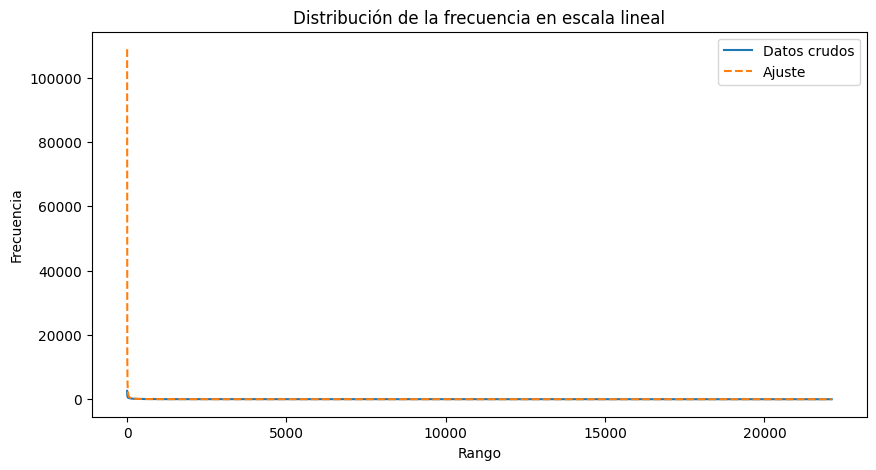

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(rank, frequencies, label='Datos crudos')
plt.plot(rank, np.exp(fit(log_rank)), label='Ajuste', linestyle='--')
plt.xlabel('Rango')
plt.ylabel('Frecuencia')
plt.title('Distribución de la frecuencia en escala lineal')
plt.legend()
plt.show()

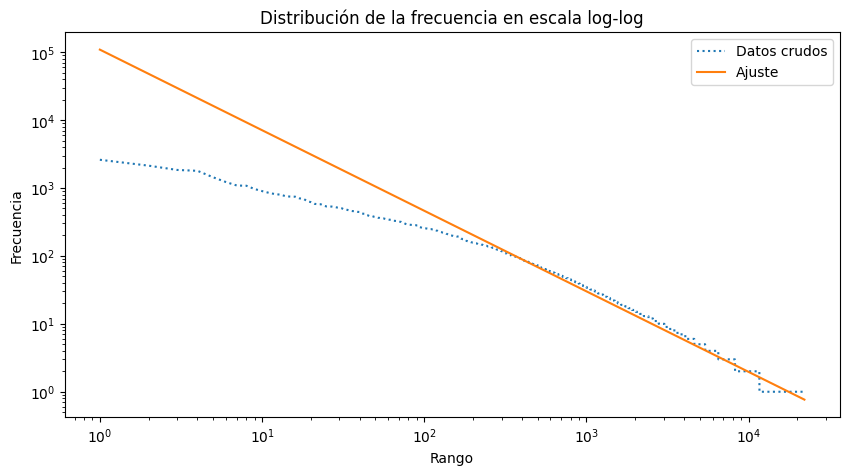

In [5]:
# Graficar los datos y el ajuste en escala log-log
plt.figure(figsize=(10, 5))
plt.loglog(rank, frequencies, label='Datos crudos', linestyle='dotted')
plt.loglog(rank, np.exp(fit(log_rank)), label='Ajuste', linestyle='-')
plt.xlabel('Rango')
plt.ylabel('Frecuencia')
plt.title('Distribución de la frecuencia en escala log-log')
plt.legend()
plt.show()

La predicción se comporta desviado respecto a la recta de ajuste, ésto puede deberse a la presencia de demasiados outliers.